<a href="https://colab.research.google.com/github/Wyw021214/ISP_autism/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install -q nilearn nibabel pandas numpy matplotlib requests boto3 awscli seaborn


In [36]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image
import seaborn as sns

## Abide

To do:
Find out why they are some values `-9999`. Are they `NaN`?

**Data legend**
> http://fcon_1000.projects.nitrc.org/indi/abide/ABIDEII_Data_Legend.pdf

In [5]:
summary_url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv"
phenotypic_file = "phenotypic_data.csv"

!wget -O {phenotypic_file} {summary_url}

phenotypic_data = pd.read_csv(phenotypic_file)
phenotypic_data.head()

--2024-12-19 11:47:54--  https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv
Resolving fcp-indi.s3.amazonaws.com (fcp-indi.s3.amazonaws.com)... 54.231.137.105, 3.5.29.190, 3.5.28.52, ...
Connecting to fcp-indi.s3.amazonaws.com (fcp-indi.s3.amazonaws.com)|54.231.137.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449443 (439K) [application/octet-stream]
Saving to: ‘phenotypic_data.csv’

phenotypic_data.csv 100%[===================>] 438.91K  2.25MB/s    in 0.2s    

2024-12-19 11:47:54 (2.25 MB/s) - ‘phenotypic_data.csv’ saved [449443/449443]



,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1


In [7]:
# Print all the columns from the demographic data
print(phenotypic_data.columns.tolist())

# Some variables that could be of interest
# AGE_AT_SCAN, SEX, FIQ, SRS_AWARENESS_T, SRS_COGNITION_T, AQ_TOTAL

['Unnamed: 0', 'Unnamed: 0.1', 'SUB_ID', 'X', 'subject', 'SITE_ID', 'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE', 'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV', 'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB', 'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION', 'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION', 'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL', 'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED', 'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED', 'VINELAND_DOMESTIC_V_SCALED', 'VINELAND_COMMUNITY_V_SCALED', 'VINE

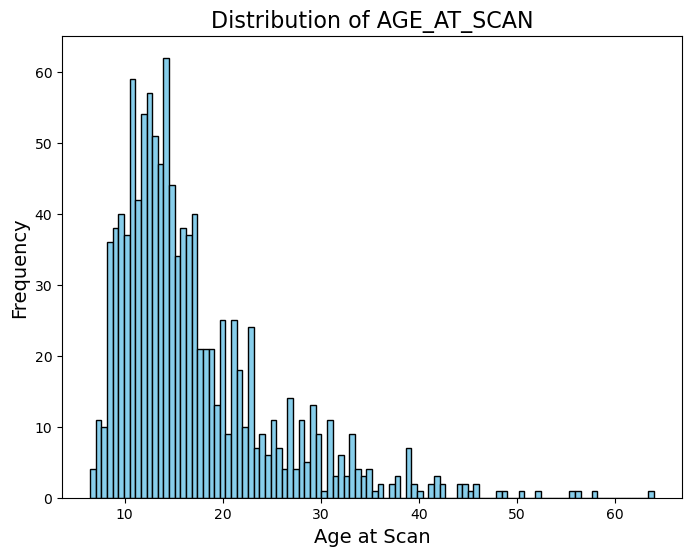

In [9]:
# Plot a histogram for the AGE_AT_SCAN variable
plt.figure(figsize=(8, 6))
phenotypic_data['AGE_AT_SCAN'].hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of AGE_AT_SCAN', fontsize=16)
plt.xlabel('Age at Scan', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

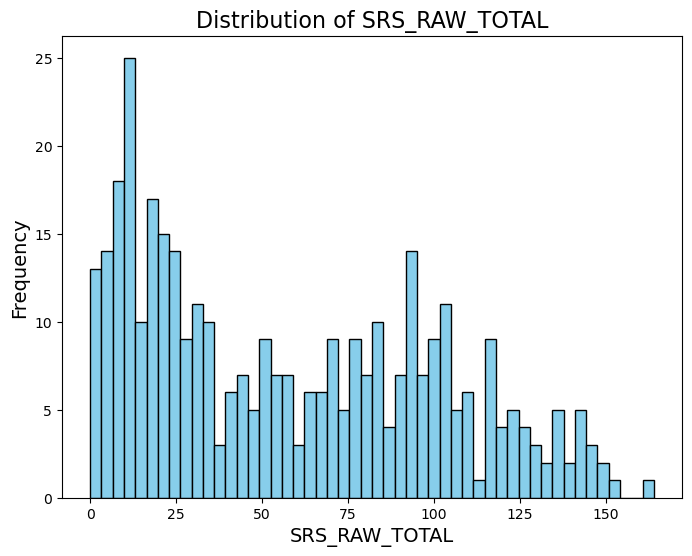

In [31]:
# filtered data (exclude those -9999 values)
phenotypic_data_filtered = phenotypic_data['SRS_RAW_TOTAL'][phenotypic_data['SRS_RAW_TOTAL'] != - 9999]

# Plot a histogram for the FIQ variable
plt.figure(figsize=(8, 6))
phenotypic_data_filtered.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of SRS_RAW_TOTAL', fontsize=16)
plt.xlabel('SRS_RAW_TOTAL', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

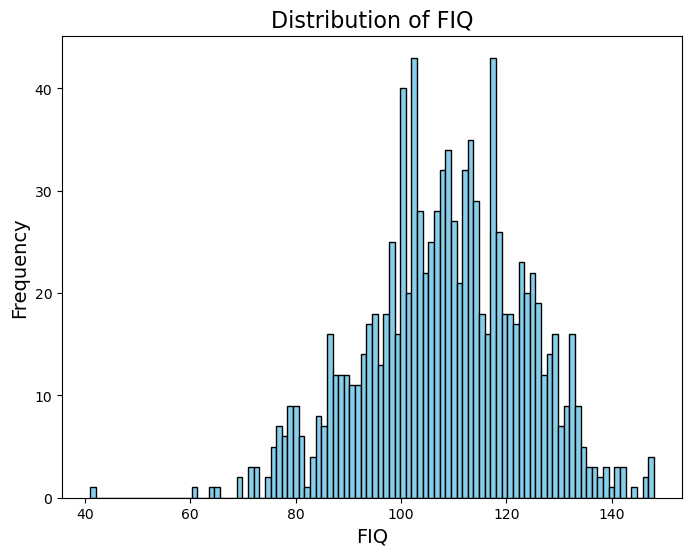

In [25]:
# filtered data (exclude those -9999 values)
phenotypic_data_filtered = phenotypic_data['FIQ'][phenotypic_data['FIQ'] != - 9999]

# Plot a histogram for the FIQ variable
plt.figure(figsize=(8, 6))
phenotypic_data_filtered.hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of FIQ', fontsize=16)
plt.xlabel('FIQ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.show()

## Download the ADIBE data

In [11]:
base_url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE_Initiative/Outputs"
"""
[pipeline] = ccs | cpac | dparsf | niak
[strategy] = filt_global | filt_noglobal | nofilt_global | nofilt_noglobal
[file identifier] = the FILE_ID value from the summary spreadsheet
[derivative] = alff | degree_binarize | degree_weighted | dual_regression | ...
               eigenvector_binarize | eigenvector_weighted | falff | func_mask | ...
               func_mean | func_preproc | lfcd | reho | rois_aal | rois_cc200 | ...
               rois_cc400 | rois_dosenbach160 | rois_ez | rois_ho | rois_tt | vmhc
[ext] = 1D | nii.gz"""

pipeline = "cpac"
strategy = "filt_global"
derivative = "rois_aal"
file_ext = "1D"

file_ids = phenotypic_data["FILE_ID"].dropna().head(10)
download_links = [
    f"{base_url}/{pipeline}/{strategy}/{derivative}/{file_id}_{derivative}.{file_ext}"
    for file_id in file_ids
]

download_path = "/content/abide_aal"
os.makedirs(download_path, exist_ok=True)

for link in download_links:
    file_name = link.split("/")[-1]
    file_path = os.path.join(download_path, file_name)


    if not os.path.exists(file_path):
        print(f"Downloading: {file_name}")
        os.system(f"wget -q -P {download_path} {link}")
    else:
        print(f"Skipping: {file_name} (already exists)")

Downloading: no_filename_rois_aal.1D
Downloading: Pitt_0050003_rois_aal.1D
Downloading: Pitt_0050004_rois_aal.1D
Downloading: Pitt_0050005_rois_aal.1D
Downloading: Pitt_0050006_rois_aal.1D
Downloading: Pitt_0050007_rois_aal.1D
Downloading: Pitt_0050008_rois_aal.1D
Downloading: Pitt_0050009_rois_aal.1D
Downloading: Pitt_0050010_rois_aal.1D
Downloading: Pitt_0050011_rois_aal.1D


In [12]:
print("\nVerifying downloaded AAL files...")
aal_files = [f for f in os.listdir(download_path) if f.endswith(".1D")]
print(f"Downloaded {len(aal_files)} AAL parcellation files:")
for f in aal_files:
    print(f)


Verifying downloaded AAL files...
Downloaded 9 AAL parcellation files:
Pitt_0050003_rois_aal.1D
Pitt_0050006_rois_aal.1D
Pitt_0050010_rois_aal.1D
Pitt_0050005_rois_aal.1D
Pitt_0050009_rois_aal.1D
Pitt_0050007_rois_aal.1D
Pitt_0050008_rois_aal.1D
Pitt_0050004_rois_aal.1D
Pitt_0050011_rois_aal.1D


In [32]:
## Funtion to plot connectomes 
def plot_connectome(mtx, Title='matrix plot', xlab='X', ylab='Y', col='rocket', vmin=None, vmax=None,
                   xticklabels='auto', yticklabels='auto',xrot=90, yrot=0, save_path=None):

    '''
    This optional function, only plots a connectome as a heatmap
    Parameters
    ----------
    mtx : np.array
    Returns
    -------
    '''
    f, ax = plt.subplots(figsize=(15,10))
    g = sns.heatmap(mtx, ax=ax, cmap=col, vmin=vmin, vmax=vmax, xticklabels=xticklabels, yticklabels=yticklabels)
    g.set_xlabel(xlab)
    g.set_ylabel(ylab)
    g.set_title(Title)
    # Rotate the x-axis labels
    # rotate tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=xrot, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=yrot, ha='right')

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    pass

In [13]:
if aal_files:
    print("\nLoading and visualizing the first AAL file...")
    first_aal_file = os.path.join(download_path, aal_files[0])
    aal_data = np.loadtxt(first_aal_file)

    # Check the data dimensions
    print(f"Shape of AAL data (timepoints x ROIs): {aal_data.shape}")


Loading and visualizing the first AAL file...
Shape of AAL data (timepoints x ROIs): (196, 116)


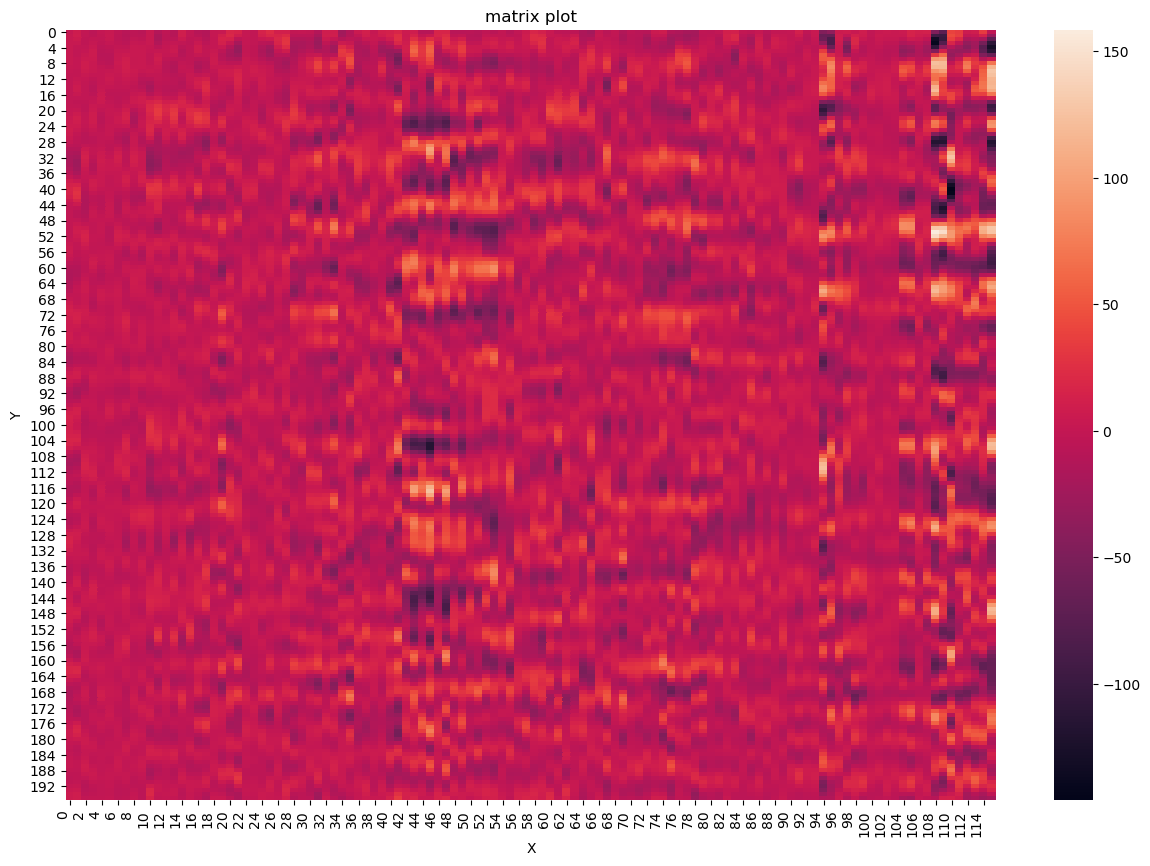

In [37]:
plot_connectome(aal_data)

## HCP dataset

### Processed data
`hcp1200/HCP1200/*/MNINonLinear/Results`

In [ ]:
!aws configure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!aws s3 cp s3://hcp-openaccess/HCP_1200/ /content/drive/MyDrive/HCP_1200/ --recursive

In [ ]:
from nilearn import datasets

sample_data = datasets.fetch_development_fmri(n_subjects=1)
func_file = sample_data['func'][0]  # Path to the NIfTI file

print(f"Sample fMRI file: {func_file}")

In [ ]:
from nilearn import datasets, image
from nilearn.input_data import NiftiLabelsMasker

aal_atlas = datasets.fetch_atlas_aal()

masker = NiftiLabelsMasker(labels_img=aal_atlas.maps, standardize=True)

hcp_img = image.load_img(func_file)
hcp_time_series = masker.fit_transform(hcp_img)
print(f"Extracted time series shape: {hcp_time_series.shape}")
